# Mission 1. Netflix and Code

## Mandatory Part

In [1]:
import pandas as pd
nf = pd.read_csv('netflix_titles.csv')
nf[nf['country'] == 'South Korea'].shape[0]

183

## Bonus Part

In [2]:
counts = nf.groupby(by='country').count()['show_id'] # since nf['show_id'].isnull().sum() is equal to zero
counts = counts.sort_values(ascending=False)
counts.index[0], counts[0]

('United States', 2555)

# Mission 2. 가즈아!

## Mandatory Part

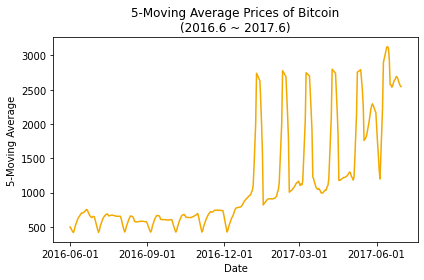

In [3]:
import matplotlib.pyplot as plt
bc = pd.read_csv('BitCoin.csv', index_col=0)
color = '#f2a900'
ticks = ['2016-06-01', '2016-09-01', '2016-12-01', '2017-03-01', '2017-06-01']

def sort_select(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df.sort_values(by='Date', inplace=True)
    df['5-MA'] = df['Open'].rolling(5).mean()
    return df[df['Date'].between('2016-06-01', '2017-06-30')]

bc_range = sort_select(bc)

plt.plot(bc_range['Date'], bc_range['5-MA'], color=color, label='Bitcoin')
plt.xticks(ticks)
plt.xlabel('Date')
plt.ylabel('5-Moving Average')
plt.title('5-Moving Average Prices of Bitcoin\n(2016.6 ~ 2017.6)')
plt.tight_layout()
plt.show()

## Bonus Part

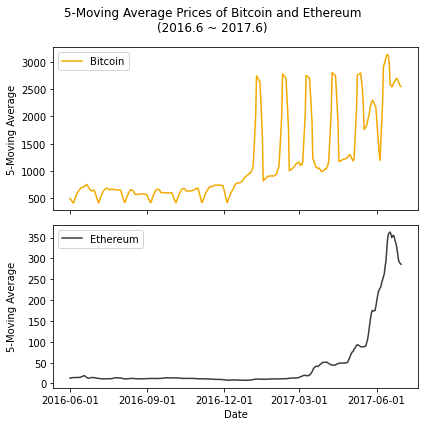

In [4]:
eth = pd.read_csv('ETH_day.csv')
eth_range = sort_select(eth)

data = [bc_range, eth_range]
color = ['#f2a900', '#3c3c3d']
labels = ['Bitcoin', 'Ethereum']

fig, axs = plt.subplots(2, 1, sharex=True, figsize=[6, 6])
for i, ax in enumerate(axs):
    axs[i].plot(data[i]['Date'], data[i]['5-MA'], color=color[i], label=labels[i])
    axs[i].set_ylabel('5-Moving Average')
    axs[i].legend()

plt.xticks(ticks)
plt.xlabel('Date')
plt.suptitle('5-Moving Average Prices of Bitcoin and Ethereum\n(2016.6 ~ 2017.6)')
fig.align_ylabels()
plt.tight_layout()
plt.show()